# EJERCICIOS

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import os

2025-02-13 19:39:21.371870: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 19:39:21.379754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-13 19:39:21.387844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-13 19:39:21.390320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 19:39:21.398925: I tensorflow/core/platform/cpu_feature_guar

In [3]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

## EJERCICIO 1


Supongamos que queremos predecir dos objetivos diferentes (por ejemplo, precio y categoría) a partir de dos conjuntos de características diferentes (por ejemplo, características visuales y características de texto de un producto).

* Características visuales: un conjunto de 128 características numéricas, que podrían representar, por ejemplo, valores de píxeles o características extraídas de imágenes.
* Características de texto: un conjunto de 256 características numéricas, representando posiblemente la codificación de texto o características lingüísticas.
* Precio (Salida 1): un valor numérico que representa el precio de un producto.
* Categoría (Salida 2): una etiqueta de categoría, que asumiremos que puede tomar 10 valores diferentes (por ejemplo, 10 categorías diferentes de productos).

Voy a generar datos aleatorios

In [248]:
# Generación de datos ficticios
num_muestras = 1000  # Número de muestras en el conjunto de datos

# Características visuales: 128 características numéricas
caracteristicas_visuales = np.random.rand(num_muestras, 128)

# Características de texto: 256 características numéricas
caracteristicas_texto = np.random.rand(num_muestras, 256)

# Precio (Salida 1): Valor numérico (por ejemplo, precio de un producto)
precio = np.random.rand(num_muestras, 1)

# Categoría (Salida 2): 10 categorías posibles (codificadas en one-hot)
categorias = np.random.randint(0, 10, size=(num_muestras, 1))
categorias_one_hot = tf.keras.utils.to_categorical(categorias, num_classes=10)

Divide los datos en entrenamiento y prueba

In [249]:
# Dividir los datos
X_visual_train, X_visual_test, X_texto_train, X_texto_test, y_precio_train, y_precio_test, y_categoria_train, y_categoria_test = train_test_split(
    caracteristicas_visuales,  
    caracteristicas_texto,     
    precio,                    
    categorias_one_hot,        
    test_size=0.2,             
    random_state=42          
)



In [250]:
y_precio_test

array([[0.2284269 ],
       [0.99498472],
       [0.0785332 ],
       [0.08968801],
       [0.25069387],
       [0.16749302],
       [0.03505072],
       [0.63214049],
       [0.53600795],
       [0.58982535],
       [0.37755363],
       [0.40656517],
       [0.99570565],
       [0.66658258],
       [0.78067723],
       [0.63922831],
       [0.19705271],
       [0.4504449 ],
       [0.08938029],
       [0.20525075],
       [0.54016044],
       [0.36398125],
       [0.98994024],
       [0.17458029],
       [0.19313351],
       [0.60623683],
       [0.17391118],
       [0.44514633],
       [0.19896855],
       [0.40860394],
       [0.0539628 ],
       [0.03348112],
       [0.31274085],
       [0.61042734],
       [0.46088776],
       [0.04430914],
       [0.78420039],
       [0.42812107],
       [0.21392904],
       [0.81912009],
       [0.78767993],
       [0.36892258],
       [0.38895922],
       [0.30577018],
       [0.05940086],
       [0.81828906],
       [0.59030046],
       [0.883

Construye el modelo:
* Crea dos ramas de entrada, una para cada tipo de características.
* Las ramas se fusionarán para predecir el precio.
* Una de las ramas se utilizará también para predecir la categoria.

El esquema es el siguiente:

<img src="Datos/esquema_modelo_funcional.png" alt="esquema modelo funcional"/>

In [251]:
#Capa de entrada visual
input_visual = tf.keras.layers.Input(shape=[128], name="input_visual") 
#Capa de entrada de texto
input_texto = tf.keras.layers.Input(shape=[256], name="input_texto")  

rama_visual = tf.keras.layers.Dense(64, activation="relu")(input_visual)
rama_texto = tf.keras.layers.Dense(128, activation="relu")(input_texto)

#Concatenación de las ramas
concat = tf.keras.layers.concatenate([rama_visual, rama_texto])

#Capas de salida
output_precio = tf.keras.layers.Dense(1 , name="output_precio")(concat)
output_categoria = tf.keras.layers.Dense(10, activation="softmax",name="output_categoria")(rama_texto)



In [252]:
# Crear el modelo
model = Model(inputs=[input_visual, input_texto], outputs=[output_precio, output_categoria])

Comprueba creando una imagen del modelo que es igual que el que se pide

In [253]:
model.summary()

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_visual        │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_texto         │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_125 (Dense)   │ (None, 64)        │      8,256 │ input_visual[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_126 (Dense)   │ (None, 128)       │     32,896 │ input_texto[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 192)       │          0 │ dense_125[0][0],  │
│ (Concatenate)       │                   │            │ dense_126[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_precio       │ (None, 1)         │        193 │ concatenate_23[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_categoria    │ (None, 10)        │      1,290 │ dense_126[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,635 (166.54 KB)

 Trainable params: 42,635 (166.54 KB)

 Non-trainable params: 0 (0.00 B)

Compila el modelo especificando las pérdidas y métricas para cada salida (utiliza el optimizador Adam)

In [254]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss={
        'output_precio': 'mean_squared_error',  # Pérdida para el precio (regresión)
        'output_categoria': 'categorical_crossentropy'  # Pérdida para la categoría (clasificación)
    },
    metrics={
        'output_categoria': 'accuracy', # Métrica para la categoría (precisión)
        'output_precio': 'mae'
    }
)

Entrena el modelo 

In [255]:
#Entrenar el modelo
history = model.fit(
    (X_visual_train, X_texto_train),
    (y_precio_train, y_categoria_train),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/home/iabd/anaconda3/envs/sapaGPU/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_visual', 'input_texto']. Received: the structure of inputs=('*', '*')
  warnings.warn(
/home/iabd/anaconda3/envs/sapaGPU/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0919 - output_categoria_accuracy: 0.0952 - output_categoria_loss: 0.0919 - output_precio_loss: 6.3540e-08 - output_precio_mae: 0.3532 - val_loss: 0.0918 - val_output_categoria_accuracy: 0.1000 - val_output_categoria_loss: 0.0918 - val_output_precio_loss: 6.2186e-08 - val_output_precio_mae: 0.3006
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0902 - output_categoria_accuracy: 0.1518 - output_categoria_loss: 0.0902 - output_precio_loss: 6.1767e-08 - output_precio_mae: 0.3129 - val_loss: 0.0913 - val_output_categoria_accuracy: 0.1250 - val_output_categoria_loss: 0.0913 - val_output_precio_loss: 6.2186e-08 - val_output_precio_mae: 0.2877
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0886 - output_categoria_accuracy: 0.1755 - output_categoria_loss: 0.0886 - output_precio_loss: 6.2675e-08 - output_precio_mae: 0.3053 - val_loss: 0.0906 - val_output_categoria_accuracy: 0.1000 - val_output_categoria_loss: 0.0906 - val

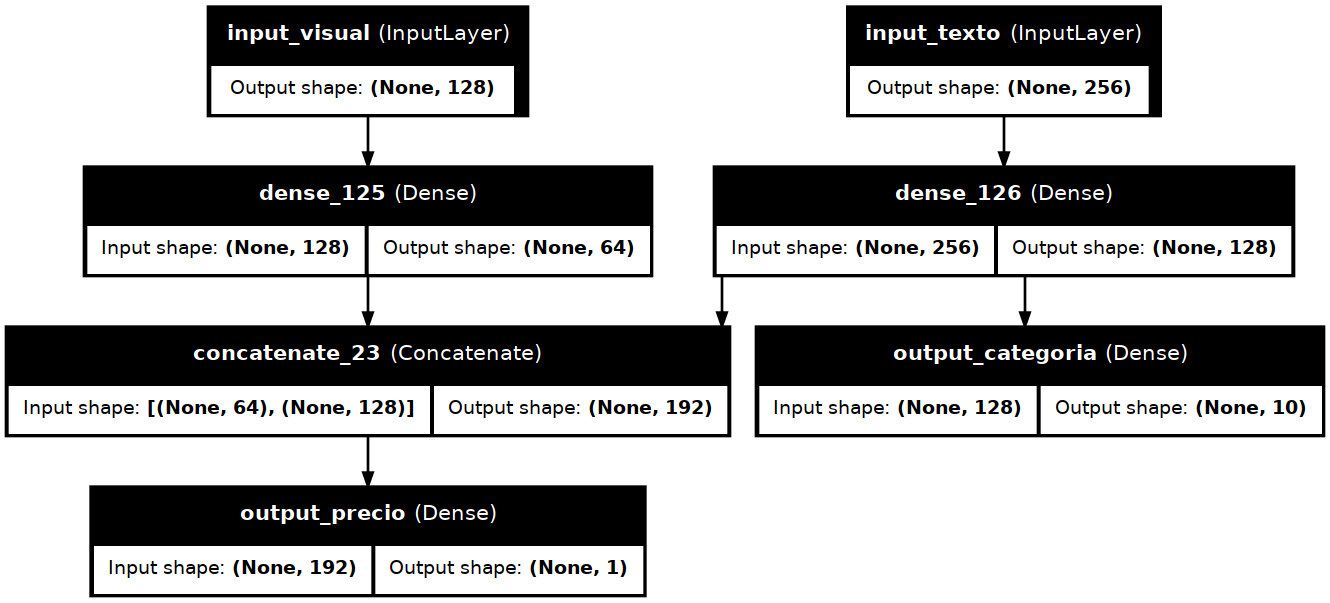

In [256]:
from keras.utils import plot_model
from IPython.display import Image, display

# Crear la imagen del modelo y guardarla en un archivo
plot_model(
model,
to_file="modelo_funcional.png", # Nombre del archivo de salida
show_shapes=True, # Mostrar las formas de los tensores en la imagen
show_layer_names=True, # Mostrar los nombres de las capas
dpi=96 # Resolución de la imagen
)

Evalúa el modelo en el conjunt de pruebas

In [257]:
eval_results = model.evaluate((X_visual_test, X_texto_test ), ( y_precio_test, y_categoria_test ), verbose=1)
print(eval_results)

/home/iabd/anaconda3/envs/sapaGPU/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_visual', 'input_texto']. Received: the structure of inputs=('*', '*')
  warnings.warn(
/home/iabd/anaconda3/envs/sapaGPU/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1168 - output_categoria_accuracy: 0.0952 - output_categoria_loss: 0.1166 - output_precio_loss: 5.5660e-08 - output_precio_mae: 0.5630
[0.11480795592069626, 5.8761116861205664e-08, 0.11422143876552582, 0.125, 0.5722557306289673]


In [258]:
# Realizar predicciones
predicciones_precio, predicciones_categoria = model.predict((X_visual_test, X_texto_test))

# Mostrar algunas predicciones
print("Predicciones de precio:", predicciones_precio[:5])
print("Predicciones de categoría:", np.argmax(predicciones_categoria[:5], axis=1))
print("Categorías reales:", np.argmax(y_categoria_test[:5], axis=1))
print("Precios reales:", y_precio_test[:5])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicciones de precio: [[ 0.03202167]
 [-0.4447205 ]
 [ 0.9932256 ]
 [ 0.25615597]
 [-0.41002566]]
Predicciones de categoría: [1 1 7 1 0]
Categorías reales: [4 9 5 9 1]
Precios reales: [[0.2284269 ]
 [0.99498472]
 [0.0785332 ]
 [0.08968801]
 [0.25069387]]


## EJERCICIO 2

El objetivo de este ejercicio es entrenar un modelo en un subconjunto de clases (Modelo A) y luego usar este modelo para entrenar otro modelo en un subconjunto diferente de clases (Modelo B), primero sin y luego con el conocimiento transferido del Modelo A.

Carga los datos de CIFAR-10, representa alguna de sus imágenes con sus etiquetas, haz una lista con las etiquetas que tiene (busca en internet) y normaliza los datos dividiendo entre 255.0.

Divide los datos en conjuntos de entrenamiento, pruebas y validación para el modelo A y para el modelo B:
* El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"
* El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo" 

In [4]:
# Cargar datos CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


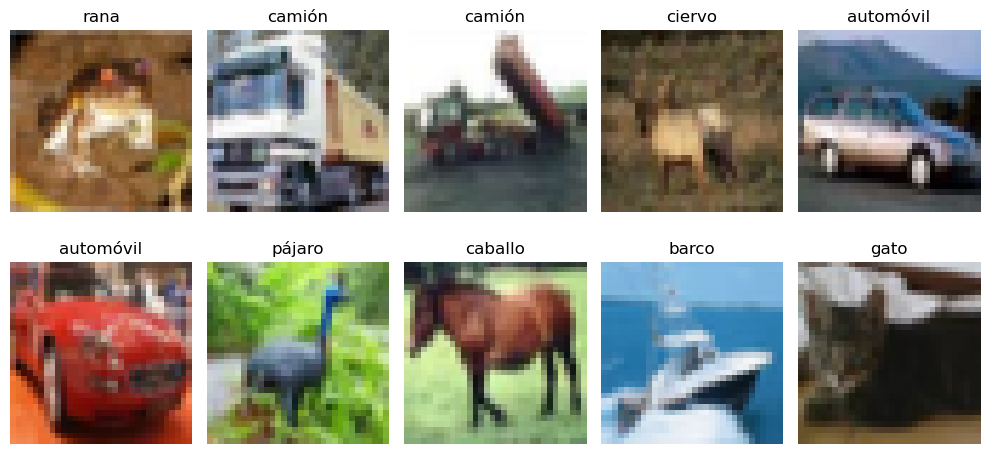

In [5]:
# Lista de etiquetas de CIFAR-10
class_names = [
    "avión", "automóvil", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"
]

# Visualizar algunas imágenes con sus etiquetas
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
# Normalizar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Dividir los datos en entrenamiento, validación y pruebas para Modelo A y Modelo B

# Clases para el Modelo A y Modelo B
classes_model_a = [0, 1, 2, 3]  # "avión", "automóvil", "pájaro", "gato"
classes_model_b = [4, 5, 6, 7]  # "ciervo", "perro", "rana", "caballo"

# Filtrar datos para Modelo A
train_mask_a = np.isin(y_train, classes_model_a).flatten()
test_mask_a = np.isin(y_test, classes_model_a).flatten()

x_train_a, y_train_a = x_train[train_mask_a], y_train[train_mask_a]
x_test_a, y_test_a = x_test[test_mask_a], y_test[test_mask_a]

# Mapear etiquetas a un rango continuo para Modelo A
y_train_a = np.array([classes_model_a.index(label) for label in y_train_a.flatten()])
y_test_a = np.array([classes_model_a.index(label) for label in y_test_a.flatten()])

# Filtrar datos para Modelo B
train_mask_b = np.isin(y_train, classes_model_b).flatten()
test_mask_b = np.isin(y_test, classes_model_b).flatten()

x_train_b, y_train_b = x_train[train_mask_b], y_train[train_mask_b]
x_test_b, y_test_b = x_test[test_mask_b], y_test[test_mask_b]

# Mapear etiquetas a un rango continuo para Modelo B
y_train_b = np.array([classes_model_b.index(label) for label in y_train_b.flatten()])
y_test_b = np.array([classes_model_b.index(label) for label in y_test_b.flatten()])

# Crear conjuntos de validación

# Para Modelo A
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(x_train_a, y_train_a, test_size=0.2, random_state=42)

# Para Modelo B
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(x_train_b, y_train_b, test_size=0.2, random_state=42)

# Verificar las formas de los datos
print("Modelo A:")
print("x_train_a:", x_train_a.shape, "y_train_a:", y_train_a.shape)
print("x_val_a:", x_val_a.shape, "y_val_a:", y_val_a.shape)
print("x_test_a:", x_test_a.shape, "y_test_a:", y_test_a.shape)

print("\nModelo B:")
print("x_train_b:", x_train_b.shape, "y_train_b:", y_train_b.shape)
print("x_val_b:", x_val_b.shape, "y_val_b:", y_val_b.shape)
print("x_test_b:", x_test_b.shape, "y_test_b:", y_test_b.shape)


Modelo A:
x_train_a: (16000, 32, 32, 3) y_train_a: (16000,)
x_val_a: (4000, 32, 32, 3) y_val_a: (4000,)
x_test_a: (4000, 32, 32, 3) y_test_a: (4000,)

Modelo B:
x_train_b: (16000, 32, 32, 3) y_train_b: (16000,)
x_val_b: (4000, 32, 32, 3) y_val_b: (4000,)
x_test_b: (4000, 32, 32, 3) y_test_b: (4000,)


Entrena el Modelo A

In [7]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes_model_a), activation='softmax')
])

model_a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

history_a = model_a.fit(x_train_a, y_train_a, epochs=30, validation_data=(x_val_a, y_val_a))

# Evaluar el modelo A
test_loss_a, test_acc_a = model_a.evaluate(x_test_a, y_test_a)
print(f"\nPérdida en prueba del Modelo A: {test_loss_a}")
print(f"Exactitud en prueba del Modelo A: {test_acc_a}")

/home/iabd/anaconda3/envs/sapaTotal/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1739471989.199104   14273 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739471989.227882   14273 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739471989.228040 

Epoch 1/30


I0000 00:00:1739471990.462019   14588 service.cc:146] XLA service 0x79fe70004460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739471990.462043   14588 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-13 19:39:50.477604: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-13 19:39:50.554712: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


107/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2884 - sparse_categorical_accuracy: 0.3455

I0000 00:00:1739471991.644801   14588 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0275 - sparse_categorical_accuracy: 0.5225 - val_loss: 0.7704 - val_sparse_categorical_accuracy: 0.6935
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6429 - sparse_categorical_accuracy: 0.7444 - val_loss: 0.6056 - val_sparse_categorical_accuracy: 0.7567
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5222 - sparse_categorical_accuracy: 0.7942 - val_loss: 0.5516 - val_sparse_categorical_accuracy: 0.7770
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4542 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.4978 - val_sparse_categorical_accuracy: 0.8155
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3870 - sparse_categorical_accuracy: 0.8571 - val_loss: 0.4607 - val_sparse_categorical_accuracy: 0.8225
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3215 - sparse_categorical_accuracy: 0.8763 - val_loss: 0.5017 - val_sparse_categorical_accuracy: 0.8167
Epoch 7/30
500/

Entrenar el Modelo B desde 0

In [8]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes_model_a), activation='softmax')
])

model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

history_b = model_b.fit(x_train_b, y_train_b, epochs=30, validation_data=(x_val_b, y_val_b))

# Evaluar el modelo B
test_loss_b, test_acc_b = model_b.evaluate(x_test_b, y_test_b)


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1868 - sparse_categorical_accuracy: 0.4465 - val_loss: 0.8345 - val_sparse_categorical_accuracy: 0.6743
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7331 - sparse_categorical_accuracy: 0.7088 - val_loss: 0.6608 - val_sparse_categorical_accuracy: 0.7372
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5934 - sparse_categorical_accuracy: 0.7746 - val_loss: 0.6108 - val_sparse_categorical_accuracy: 0.7607
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5068 - sparse_categorical_accuracy: 0.8035 - val_loss: 0.5890 - val_sparse_categorical_accuracy: 0.7770
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4238 - sparse_categorical_accuracy: 0.8398 - val_loss: 0.5455 - val_sparse_categorical_accuracy: 0.7952
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3562 - sparse_categorical_accuracy: 0.8705 - val_loss: 0.5532 - val_sparse_categorical_accuracy: 0.7997
Epoc

Entrenar el Modelo B utilizando las capas aprendidas del Modelo A (excepto la capa de salida)

In [9]:
# Entrenar el modelo B utilizando las capas aprendidas del Modelo A


model_a_clone = tf.keras.models.clone_model(model_a)

model_a_clone.set_weights(model_a.get_weights())

model_b_copy_a = Sequential(model_a_clone.layers[:-1])

# Nueva capa de salida con 4 neuronas (para las 4 clases de Modelo B)
model_b_copy_a.add(Dense(4, activation='softmax'))

# Congelar las capas convolucionales y densas preentrenadas del Modelo A
for layer in model_b_copy_a.layers[:-1]:
    layer.trainable = False # No entrenar las capas previas



model_b_copy_a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_b_copy = model_b_copy_a.fit(x_train_b, y_train_b, epochs=30, validation_data=(x_val_b, y_val_b))

# Evaluar el modelo B
test_loss_b_copy_a, test_acc_b_copy_a = model_b_copy_a.evaluate(x_test_b, y_test_b)


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3188 - loss: 1.9199 - val_accuracy: 0.4098 - val_loss: 1.3087
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4241 - loss: 1.2882 - val_accuracy: 0.4760 - val_loss: 1.2071
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4697 - loss: 1.2078 - val_accuracy: 0.4997 - val_loss: 1.1692
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4938 - loss: 1.1740 - val_accuracy: 0.5065 - val_loss: 1.1594
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5037 - loss: 1.1639 - val_accuracy: 0.5058 - val_loss: 1.1474
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5020 - loss: 1.1581 - val_accuracy: 0.5173 - val_loss: 1.1385
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5090 - loss: 1.1543 - val_accuracy: 0.5082 - val_loss: 1.1449
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5130 - loss: 1.1440 - val_accuracy: 0.

Evaluar los dos modelos para el conjunto de datos B en el conjunto de pruebas

In [10]:
print(f"\nPérdida en prueba del Modelo B: {test_loss_b}")
print(f"Exactitud en prueba del Modelo B: {test_acc_b}")
print(f"\nPérdida en prueba del Modelo B base A: {test_loss_b_copy_a}")
print(f"Exactitud en prueba del Modelo B base A: {test_acc_b_copy_a}")


Pérdida en prueba del Modelo B: 1.2384032011032104
Exactitud en prueba del Modelo B: 0.8019999861717224

Pérdida en prueba del Modelo B base A: 1.1443694829940796
Exactitud en prueba del Modelo B base A: 0.5067499876022339


In [12]:
# Descongelar todas las capas para poder entrenarlas nuevamente
for layer in model_b_copy_a.layers[:-1]:  # Excluyendo la capa de salida
    layer.trainable = True

# Recompilar el modelo después de hacer los cambios en `trainable`
model_b_copy_a.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Volver a entrenar el modelo B
history_b_copy = model_b_copy_a.fit(x_train_b, y_train_b, epochs=30, validation_data=(x_val_b, y_val_b))

# Evaluar el modelo B
test_loss_b_copy_a, test_acc_b_copy_a = model_b_copy_a.evaluate(x_test_b, y_test_b)

print(f"\nPérdida en prueba del Modelo B base A sin congelar: {test_loss_b_copy_a}")
print(f"Exactitud en prueba del Modelo B base A sin congelar: {test_acc_b_copy_a}")

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6477 - loss: 0.8805 - val_accuracy: 0.7508 - val_loss: 0.6540
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7929 - loss: 0.5577 - val_accuracy: 0.7728 - val_loss: 0.6213
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.4081 - val_accuracy: 0.7955 - val_loss: 0.5662
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8947 - loss: 0.2813 - val_accuracy: 0.7925 - val_loss: 0.6264
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9368 - loss: 0.1782 - val_accuracy: 0.7847 - val_loss: 0.7199
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1075 - val_accuracy: 0.7760 - val_loss: 0.8457
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0832 - val_accuracy: 0.7715 - val_loss: 0.9681
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0574 - val_accuracy: 0.

¿En este caso merece la pena?

In [11]:
#No, de hecho los resultados empeoran considerablemente. 